In [1]:
import optuna
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import StratifiedKFold

c:\laragon\bin\python\python-3.10\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('../datamining/datasets/breast-cancer.csv') # Ubah sesuai dengan lokasi relatif file breast-cancer.csv
df.head()

,Grouping,Age (years),Education,Working status,Marital status,Menarche (years),Menopause,First pregnancy,Parity,Breastfeeding,Highfat,BMI,Ethnicity
0,BC,>= 50,Senior high school,Housewife,Marriage,12 to 13,< 50 years,20-29 years,>= Multiparous,>=12 months,Normal,Obesity,Minangnese
1,Non-BC,>= 50,Vocational degree,Master's student,Single/ widow,>13,< 50 years,>30 years,>= Multiparous,<12 months,High,Normal,Minangnese
2,BC,>= 50,Senior high school,Housewife,Marriage,7 to 11,< 50 years,20-29 years,>= Multiparous,>=12 months,Normal,Normal,Javanese
3,Non-BC,>= 50,Senior high school,Master's student,Marriage,12 to 13,< 50 years,20-29 years,Primiparous,>=12 months,High,Normal,Javanese
4,BC,>= 50,Senior high school,Private servant,Marriage,>13,< 50 years,20-29 years,>= Multiparous,>=12 months,High,Normal,Minangnese


### PREPROCESSING

In [3]:
df.isnull().sum()

Grouping            0
Age (years)         0
Education           0
Working status      0
Marital status      0
Menarche (years)    0
Menopause           0
First pregnancy     2
Parity              0
Breastfeeding       0
Highfat             0
BMI                 0
Ethnicity           0
dtype: int64

<Axes: xlabel='First pregnancy'>

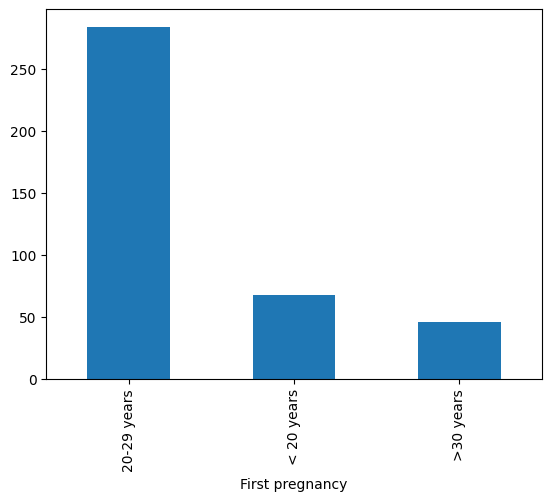

In [4]:
df['First pregnancy'].value_counts().plot.bar()

In [5]:
df['First pregnancy'] = df['First pregnancy'].fillna('20-29 years')

In [6]:
df.isnull().sum()

Grouping            0
Age (years)         0
Education           0
Working status      0
Marital status      0
Menarche (years)    0
Menopause           0
First pregnancy     0
Parity              0
Breastfeeding       0
Highfat             0
BMI                 0
Ethnicity           0
dtype: int64

### LABEL ENCODING

In [7]:
# Mengubah data kategorikal menjadi numerik
label_encoder = LabelEncoder()
for column in df.columns.drop('Grouping'):
    df[column] = label_encoder.fit_transform(df[column])

print(df.head())

# Memisahkan atribut dan label
X = df.drop('Grouping', axis=1)
y = df['Grouping']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("Jumlah Data Train: {}".format(len(X_train)))
print("Jumlah Data Test: {}".format(len(X_test)))

  Grouping  Age (years)  Education  Working status  Marital status  \
0       BC            1          4               3               0   
1   Non-BC            1          6               4               1   
2       BC            1          4               3               0   
3   Non-BC            1          4               4               0   
4       BC            1          4               5               0   

   Menarche (years)  Menopause  First pregnancy  Parity  Breastfeeding  \
0                 0          0                0       0              1   
1                 2          0                2       0              0   
2                 1          0                0       0              1   
3                 0          0                0       2              1   
4                 2          0                0       0              1   

   Highfat  BMI  Ethnicity  
0        1    1          1  
1        0    0          1  
2        1    0          0  
3        0    0   

### HYPERPARAMETER TUNING PROCESS

In [8]:
# top_6 = ['Breastfeeding', 'Highfat', 'Parity', 'Menopause', 'Education', 'Age (years)']

# def objective(trial):
# 	classifier_name = trial.suggest_categorical(name='classifier', choices=['DecisionTree', 'RandomForest'])
# 	if classifier_name == 'DecisionTree':
# 		criterion = trial.suggest_categorical(name='criterion', choices=['gini', 'entropy', 'log_loss'])
# 		splitter = trial.suggest_categorical(name='splitter', choices=['best', 'random'])
# 		min_samples_split = trial.suggest_int(name='min_samples_split', low=2, high=10, step=1)
# 		max_depth = trial.suggest_int(name='max_depth', low=2, high=10, step=1)
# 		clf = DecisionTreeClassifier(
# 			criterion=criterion,
# 			splitter=splitter,
# 			min_samples_split=min_samples_split,
# 			max_depth=max_depth
# 		)
# 	else:
# 		n_estimators = trial.suggest_int(name='n_estimators', low=100, high=150, step=5)
# 		criterion = trial.suggest_categorical(name='criterion', choices=['gini', 'entropy', 'log_loss'])
# 		min_samples_split = trial.suggest_int(name='min_samples_split', low=2, high=10, step=1)
# 		max_depth = trial.suggest_int(name='max_depth', low=2, high=10, step=1)
# 		clf = RandomForestClassifier(
# 			n_estimators=n_estimators,
# 			criterion=criterion,
# 			min_samples_split=min_samples_split,
# 			max_depth=max_depth
# 		)

# 	skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
# 	score = cross_val_score(clf, X_train[top_6], y_train, n_jobs=-1, cv=skf, scoring='accuracy')
# 	accuracy = score.max()
# 	return accuracy

# study = optuna.create_study(
# 	direction='maximize',
# 	study_name='GiveMeMoreMore',
# 	storage='sqlite:///givememoremore.db',
# 	load_if_exists=True,
# )

# study.optimize(objective, n_trials=400)
# print(f"Best value: {study.best_value} with best params: {study.best_params}")

In [9]:
top_6 = ['Highfat', 'Working status', 'Breastfeeding', 'First pregnancy', 'BMI', 'Menopause', 'Education']

def objective(trial):
	classifier_name = trial.suggest_categorical(name='classifier', choices=['DecisionTree'])
	criterion = trial.suggest_categorical(name='criterion', choices=['gini', 'entropy', 'log_loss'])
	splitter = trial.suggest_categorical(name='splitter', choices=['best', 'random'])
	min_samples_split = trial.suggest_int(name='min_samples_split', low=2, high=10, step=1)
	max_depth = trial.suggest_int(name='max_depth', low=2, high=10, step=1)
	class_weight_choices = ['balanced', None]  # Add 'None' to the list
	class_weight = trial.suggest_categorical(name='class_weight', choices=class_weight_choices)
	clf = DecisionTreeClassifier(
		criterion=criterion,
		splitter=splitter,
		min_samples_split=min_samples_split,
		max_depth=max_depth,
		class_weight=class_weight,
		random_state=1
	)
	
	skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	score = cross_val_score(clf, X_train[top_6], y_train, n_jobs=-1, cv=skf, scoring='accuracy')
	accuracy = score.max()
	return accuracy

study = optuna.create_study(
	direction='maximize',
	study_name='GiveMeMoreMorenMoremoree',
	storage='sqlite:///givememoremorenMoremoree.db',
	load_if_exists=True,
)

study.optimize(objective, n_trials=300)
print(f"Best value: {study.best_value} with best params: {study.best_params}")

[I 2024-06-27 14:37:55,125] Using an existing study with name 'GiveMeMoreMorenMoremoree' instead of creating a new one.
[I 2024-06-27 14:37:57,335] Trial 600 finished with value: 0.875 and parameters: {'classifier': 'DecisionTree', 'criterion': 'entropy', 'splitter': 'random', 'min_samples_split': 9, 'max_depth': 6, 'class_weight': 'balanced'}. Best is trial 2 with value: 0.90625.
[I 2024-06-27 14:37:58,284] Trial 601 finished with value: 0.90625 and parameters: {'classifier': 'DecisionTree', 'criterion': 'gini', 'splitter': 'random', 'min_samples_split': 5, 'max_depth': 6, 'class_weight': None}. Best is trial 2 with value: 0.90625.
[I 2024-06-27 14:37:58,401] Trial 602 finished with value: 0.875 and parameters: {'classifier': 'DecisionTree', 'criterion': 'entropy', 'splitter': 'best', 'min_samples_split': 10, 'max_depth': 4, 'class_weight': 'balanced'}. Best is trial 2 with value: 0.90625.
[I 2024-06-27 14:37:58,510] Trial 603 finished with value: 0.875 and parameters: {'classifier': 

Best value: 0.90625 with best params: {'classifier': 'DecisionTree', 'criterion': 'gini', 'splitter': 'best', 'min_samples_split': 10, 'max_depth': 4, 'class_weight': 'balanced'}


In [10]:
def cross_val_classifier(classifier, X_train, y_train, X_test, y_test, top_features, n_splits=10, random_state=1):
	fold_accuracies = []
	fold_indices = []

	kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

	top_X_train = X_train[top_features]

	for fold, (train_index, test_index) in enumerate(kf.split(top_X_train, y_train)):
		X_train_fold, X_val_fold = top_X_train.iloc[train_index], top_X_train.iloc[test_index]
		y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

		classifier.fit(X_train_fold, y_train_fold)

		accuracy = classifier.score(X_val_fold, y_val_fold)
		fold_accuracies.append(accuracy)
		fold_indices.append((train_index, test_index))

	best_fold_index = fold_accuracies.index(max(fold_accuracies))
	best_fold_accuracy = fold_accuracies[best_fold_index]
	best_fold_train_index, best_fold_val_index = fold_indices[best_fold_index]

	X_train_best_fold = top_X_train.iloc[best_fold_train_index]
	y_train_best_fold = y_train.iloc[best_fold_train_index]
	X_val_best_fold = top_X_train.iloc[best_fold_val_index]
	y_val_best_fold = y_train.iloc[best_fold_val_index]

	classifier.fit(X_train_best_fold, y_train_best_fold)

	y_pred = classifier.predict(X_test[top_features])
	test_accuracy = accuracy_score(y_test, y_pred)

	print("Best fold is fold-{} with accuracy {}".format(best_fold_index, best_fold_accuracy))
	print("Test accuracy: {}".format(test_accuracy))

	return clf

In [11]:
# Fungsi visualisasi cross validation score
def visualization(data_y_test, data_y_pred, fig_title, fig_x_label, fig_y_label):

    # Asumsikan y_test dan y_pred sudah didefinisikan
    report = classification_report(data_y_test, data_y_pred, output_dict=True)

    # Konversi dictionary ke DataFrame
    report_df = pd.DataFrame(report).transpose()

    # Drop kolom 'support' karena biasanya tidak diperlukan untuk visualisasi
    report_df = report_df.drop(columns=['support'])
    report_df = report_df.drop(['accuracy', 'macro avg', 'weighted avg'])

    # Reset index untuk mengatur ulang kolom indeks sebagai kolom normal
    report_df = report_df.reset_index()

    # Ubah DataFrame menjadi format panjang (long format)
    report_melted = pd.melt(report_df, id_vars=['index'], value_vars=['precision', 'recall', 'f1-score'],
                            var_name='Metric', value_name='Value')

    # Mengganti nama kolom untuk kejelasan
    report_melted.rename(columns={'index': 'Class'}, inplace=True)

    # Plotting menggunakan seaborn countplot
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Class', y='Value', hue='Metric', data=report_melted)

    # Menambahkan title dan label
    plt.title(fig_title)
    plt.xlabel(fig_x_label)
    plt.ylabel(fig_y_label)
    plt.ylim(0, 1)  # Pastikan y-axis berada dalam rentang 0 sampai 1 karena metrik berada dalam rentang ini

    # Menampilkan plot
    plt.legend(loc='upper right')
    plt.show()

    # Menampilkan plot
    return plt.show()

In [12]:
if study.best_params['classifier'] == 'DecisionTree':
    clf_method = DecisionTreeClassifier(
        criterion = study.best_params['criterion'],
        splitter = study.best_params['splitter'],
        min_samples_split = study.best_params['min_samples_split'],
        max_depth = study.best_params['max_depth']
    )
else:
    clf_method = RandomForestClassifier(
        n_estimators = study.best_params['n_estimators'],
        criterion = study.best_params['criterion'],
        min_samples_split = study.best_params['min_samples_split'],
        max_depth = study.best_params['max_depth']
    )

In [13]:
# Membuat klasifier DecisionTreeClassifier dengan parameter yang tidak default
clf = DecisionTreeClassifier(
        criterion = study.best_params['criterion'],
        splitter = study.best_params['splitter'],
        min_samples_split = study.best_params['min_samples_split'],
        max_depth = study.best_params['max_depth'],
        class_weight = study.best_params['class_weight'],
        random_state = 1
    )

clf.fit(X_train[top_6], y_train)
y_pred = clf.predict(X_test[top_6])

print(classification_report(y_test, y_pred))

print("Akurasi: {}".format(accuracy_score(y_test, y_pred)))
print("Precision: {}".format(precision_score(y_test, y_pred, average='macro')))
print("Recall: {}".format(recall_score(y_test, y_pred, average='macro')))
print("F1 Score: {}".format(f1_score(y_test, y_pred, average='macro')))

              precision    recall  f1-score   support

          BC       0.76      0.91      0.83        45
      Non-BC       0.85      0.63      0.72        35

    accuracy                           0.79        80
   macro avg       0.80      0.77      0.77        80
weighted avg       0.80      0.79      0.78        80

Akurasi: 0.7875
Precision: 0.8027065527065527
Recall: 0.7698412698412698
F1 Score: 0.7747971518463321


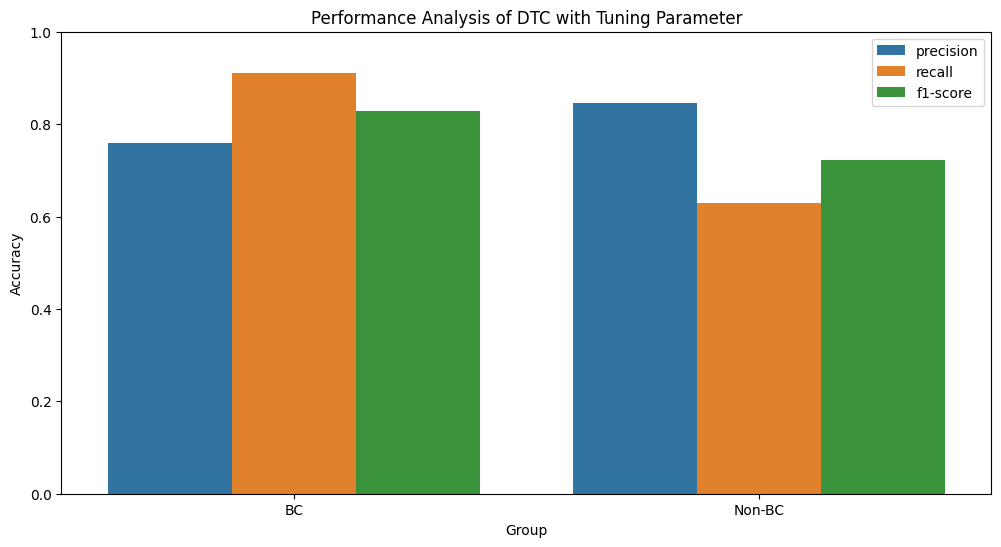

In [14]:
visualization(y_test, y_pred, 'Performance Analysis of DTC with Tuning Parameter', 'Group', 'Accuracy')

In [15]:
# Lakukan cross validation dengan 10 fold dengan StratifiedKFold

skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
accuracy_scores = cross_val_score(clf, X_train[top_6], y_train, cv=skf, scoring='accuracy')

# Pilih nilai fold dengan akurasi tertinggi
for i, acc in enumerate(accuracy_scores):
	print("Fold ke-{}: {}".format(i+1, acc))

print("Akurasi tertinggi: {}".format(accuracy_scores.max()))

Fold ke-1: 0.78125
Fold ke-2: 0.78125
Fold ke-3: 0.78125
Fold ke-4: 0.875
Fold ke-5: 0.71875
Fold ke-6: 0.84375
Fold ke-7: 0.8125
Fold ke-8: 0.6875
Fold ke-9: 0.90625
Fold ke-10: 0.84375
Akurasi tertinggi: 0.90625


In [16]:
# Lakukan cross validation dengan 10 fold dengan StratifiedKFold untuk mengambil fold terbaik
clf_best = cross_val_classifier(clf, X_train, y_train, X_test, y_test, top_6, n_splits=10, random_state=1)

Best fold is fold-8 with accuracy 0.90625
Test accuracy: 0.7875
